In [2]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
matplotlib.rcParams['savefig.dpi'] = 256
#matplotlib.rcParams['text.usetex'] = True
matplotlib.rcParams['lines.linewidth'] = 2
#matplotlib.rcParams['font.family'] = 'sans-serif'

<IPython.core.display.Javascript object>


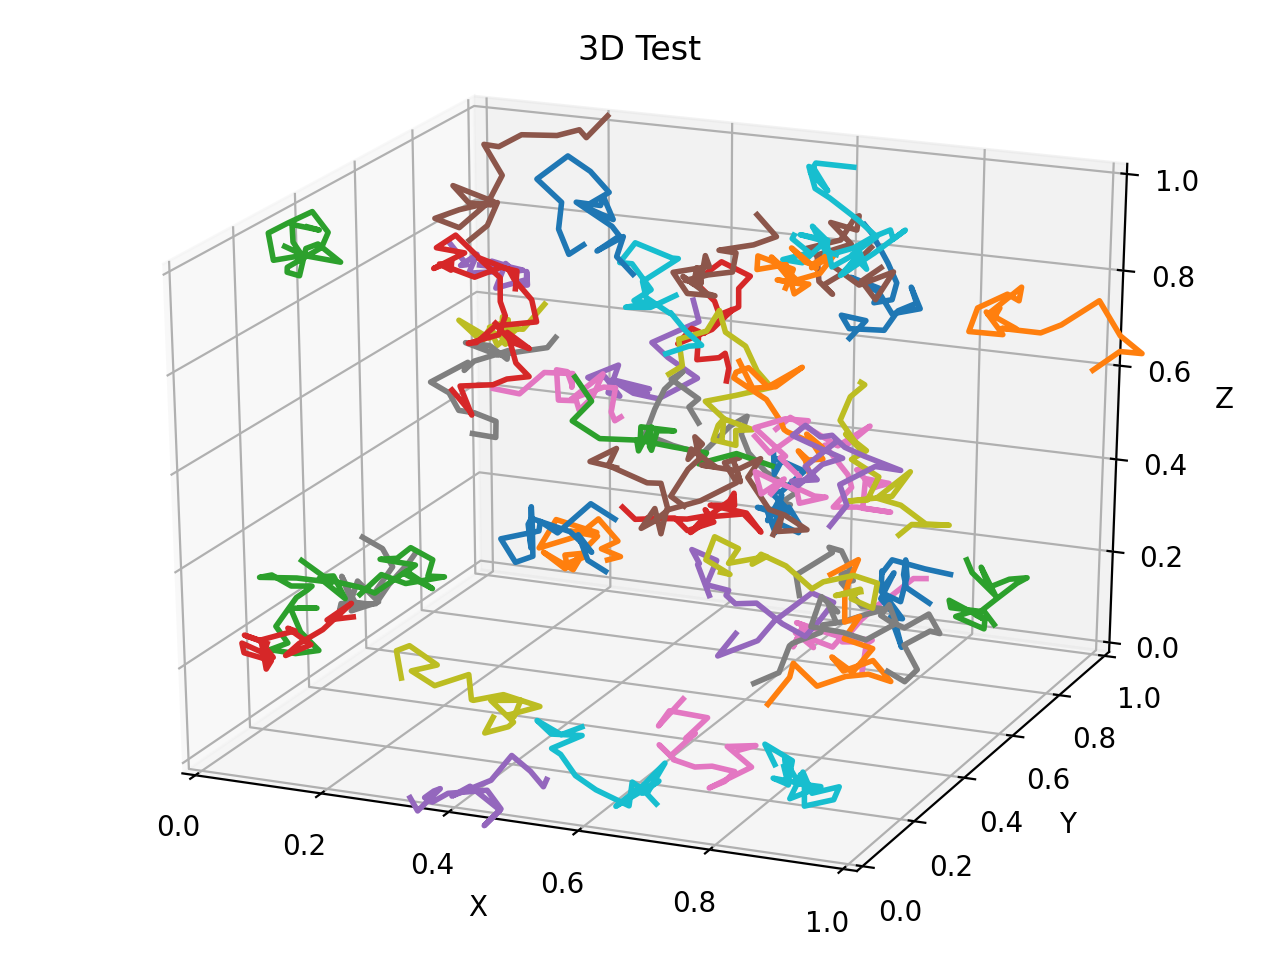

In [5]:
#official example of matplotlib
%matplotlib notebook
import mpl_toolkits.mplot3d.axes3d as p3
import matplotlib.animation as animation

# Fixing random state for reproducibility
np.random.seed(19680801)


def Gen_RandLine(length, dims=2):
    """
    Create a line using a random walk algorithm

    length is the number of points for the line.
    dims is the number of dimensions the line has.
    """
    lineData = np.empty((dims, length))
    lineData[:, 0] = np.random.rand(dims)
    for index in range(1, length):
        # scaling the random numbers by 0.1 so
        # movement is small compared to position.
        # subtraction by 0.5 is to change the range to [-0.5, 0.5]
        # to allow a line to move backwards.
        step = ((np.random.rand(dims) - 0.5) * 0.1)
        lineData[:, index] = lineData[:, index - 1] + step

    return lineData


def update_lines(num, dataLines, lines):
    for line, data in zip(lines, dataLines):
        # NOTE: there is no .set_data() for 3 dim data...
        line.set_data(data[0:2, :num])
        line.set_3d_properties(data[2, :num])
    return lines

# Attaching 3D axis to the figure
fig = plt.figure()
ax = p3.Axes3D(fig)

# Fifty lines of random 3-D lines
data = [Gen_RandLine(25, 3) for index in range(50)]

# Creating fifty line objects.
# NOTE: Can't pass empty arrays into 3d version of plot()
lines = [ax.plot(dat[0, 0:1], dat[1, 0:1], dat[2, 0:1])[0] for dat in data]

# Setting the axes properties
ax.set_xlim3d([0.0, 1.0])
ax.set_xlabel('X')

ax.set_ylim3d([0.0, 1.0])
ax.set_ylabel('Y')

ax.set_zlim3d([0.0, 1.0])
ax.set_zlabel('Z')

ax.set_title('3D Test')

# Creating the Animation object
line_ani = animation.FuncAnimation(fig, update_lines, 25, fargs=(data, lines),
                                   interval=50, blit=False)

plt.show()

In [6]:
rpath='/xspace/zt9/RPMD_MD_argon_reference/md-tutorial/LJ/result'

# classical MD movie

## Argon N=108,  nbeads=1

In [3]:
# N=108 Argon, epsilon=119.8K
# at condiiton T*=1;  rho*=0.8

In [7]:
nbeads = 1
natoms = 108 #64
idstr = "0"
filename = '%s/classicalMD/Ar_N%s/Ar_%s_TRAJ_%s.dat' % (rpath, natoms, natoms, idstr)
df = pd.read_csv(filename)

print ("Frames = ", df.shape[0]/natoms)

Frames =  1000.0


In [8]:
rho=0.8
L = pow(natoms/rho, 1.0/3.0)
L2 = L * 0.5
print ("L=", L)

L= 5.12992784003009


<IPython.core.display.Javascript object>


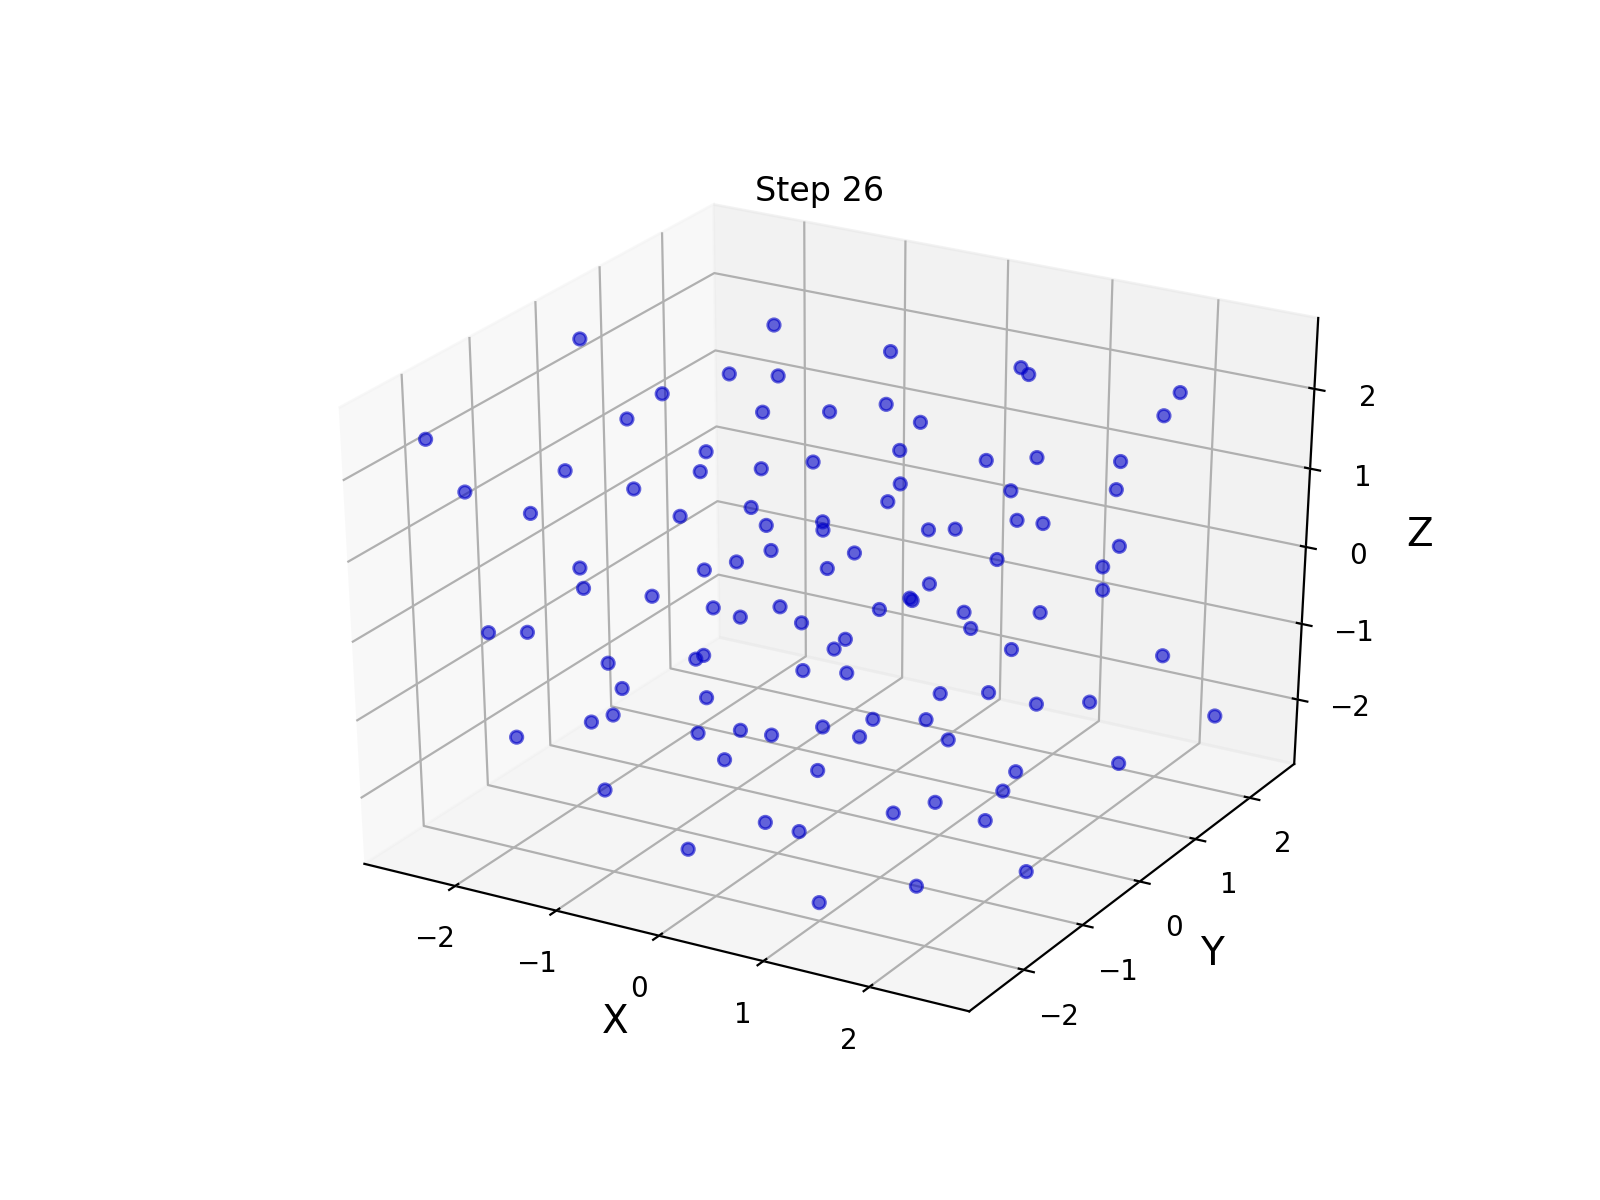

In [9]:
%matplotlib notebook
import mpl_toolkits.mplot3d.axes3d as p3
from matplotlib import animation


fig = plt.figure(10, figsize=(8, 6))
ax = fig.gca(projection='3d')
ngrid = 256
dt = 0.005
steps = int(df.shape[0]/natoms)

# L = 3.41995 #* 10#for N=32, rho=0.8
# L2 = L*0.5;
ax.set_xlabel('X',fontsize=14)
ax.set_ylabel('Y',fontsize=14)
ax.set_zlabel('Z',fontsize=14)
ax.set_xlim(-L2, L2)
ax.set_ylim(-L2, L2)
ax.set_zlim(-L2, L2)
        
def update(frame):
    Xlist=[]
    Ylist=[]
    Zlist=[]
    ax.clear()
    ax.set_xlabel('X',fontsize=14)
    ax.set_ylabel('Y',fontsize=14)
    ax.set_zlabel('Z',fontsize=14)
    #ax.set_xlim(-L2-0.5, L2+0.5)
    #ax.set_ylim(-L2-0.5, L2+0.5)
    #ax.set_zlim(-L2-0.5, L2+0.5)
    ax.set_title("Step "+str(frame))
    
    for i in range(nbeads):
        coln = 'xb' + str(i)
        X = df.loc[natoms*frame:natoms*(frame+1)-1][coln]
        coln = 'yb' + str(i)
        Y = df.loc[natoms*frame:natoms*(frame+1)-1][coln]
        coln = 'zb' + str(i)
        Z = df.loc[natoms*frame:natoms*(frame+1)-1][coln]
        Xlist.append(X)
        Ylist.append(Y)
        Zlist.append(Z)

    RPXlist = list(map(list, zip(*Xlist)))
    for i in range(len(RPXlist)):
        RPXlist[i].append(RPXlist[i][0])
        
    RPYlist = list(map(list, zip(*Ylist)))
    for i in range(len(RPXlist)):
        RPYlist[i].append(RPYlist[i][0])
        
    RPZlist = list(map(list, zip(*Zlist)))
    for i in range(len(RPZlist)):
        RPZlist[i].append(RPZlist[i][0])
        
    for i in range(nbeads):    
        mycolor =  "#%02x%02x%02x" % (int(i/(nbeads+1)*255), 0, 200) 
        scat = ax.scatter(Xlist[i], Ylist[i], Zlist[i], c=mycolor, marker='o', alpha=0.6)
        
    for i in range(natoms):    
        #mycolor =  "#%02x%02x%02x" % (int(i/nbeads*250), 0, 200) 
        line = ax.plot(RPXlist[i], RPYlist[i], RPZlist[i], color='c', alpha=0.3)


ani = animation.FuncAnimation(fig, update, frames=steps, interval=10, blit=False) 
#init_func=initial, frames=steps OR range(1000,2000), interval(default=200ms) between frames
plt.show()

# RPMD Argon N=64, nbeads=8

In [10]:
nbeads = 8
natoms = 108 
idstr = "0"

filename = '%s/RPMD/Ar_N%s_P%s/RPMD%s_LJ_%s_TRAJ_%s.dat' % (rpath,natoms,nbeads,nbeads,natoms, idstr)
df = pd.read_csv(filename)

print ("Frames = ", df.shape[0]/natoms)

rho=0.8
L = pow(natoms/rho, 1.0/3.0)
L2 = L * 0.5
print ("L=", L)

Frames =  1000.0
L= 5.12992784003009


<IPython.core.display.Javascript object>


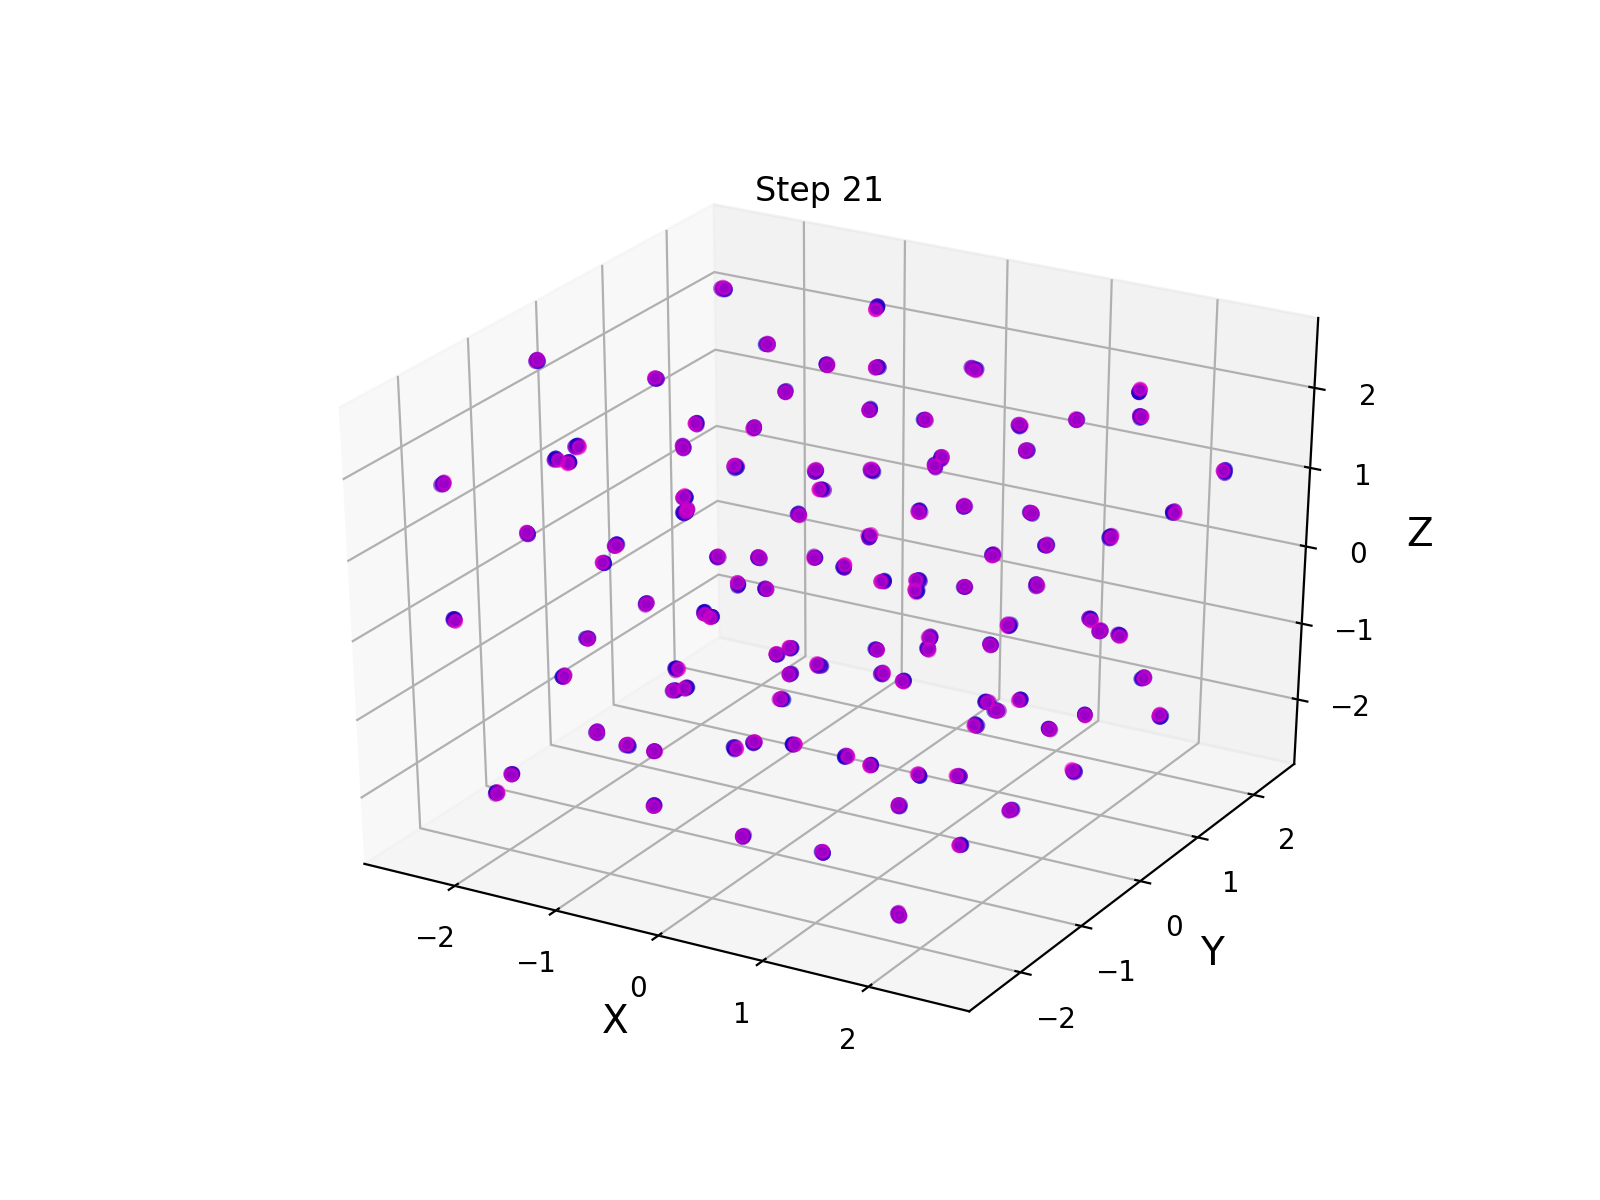

In [11]:
%matplotlib notebook
import mpl_toolkits.mplot3d.axes3d as p3
from matplotlib import animation

fig = plt.figure(10, figsize=(8, 6))
ax = fig.gca(projection='3d')
ngrid = 256
dt = 0.005
steps = int(df.shape[0]/natoms)


ax.set_xlabel('X',fontsize=14)
ax.set_ylabel('Y',fontsize=14)
ax.set_zlabel('Z',fontsize=14)
ax.set_xlim(-L2, L2)
ax.set_ylim(-L2, L2)
ax.set_zlim(-L2, L2)
        
def update(frame):
    Xlist=[]
    Ylist=[]
    Zlist=[]
    ax.clear()
    ax.set_xlabel('X',fontsize=14)
    ax.set_ylabel('Y',fontsize=14)
    ax.set_zlabel('Z',fontsize=14)
    #ax.set_xlim(-L2-0.5, L2+0.5)
    #ax.set_ylim(-L2-0.5, L2+0.5)
    #ax.set_zlim(-L2-0.5, L2+0.5)
    ax.set_title("Step "+str(frame))
    
    for i in range(nbeads):
        coln = 'xb' + str(i)
        X = df.loc[natoms*frame:natoms*(frame+1)-1][coln]
        coln = 'yb' + str(i)
        Y = df.loc[natoms*frame:natoms*(frame+1)-1][coln]
        coln = 'zb' + str(i)
        Z = df.loc[natoms*frame:natoms*(frame+1)-1][coln]
        Xlist.append(X)
        Ylist.append(Y)
        Zlist.append(Z)

    RPXlist = list(map(list, zip(*Xlist)))
    for i in range(len(RPXlist)):
        RPXlist[i].append(RPXlist[i][0])
        
    RPYlist = list(map(list, zip(*Ylist)))
    for i in range(len(RPXlist)):
        RPYlist[i].append(RPYlist[i][0])
        
    RPZlist = list(map(list, zip(*Zlist)))
    for i in range(len(RPZlist)):
        RPZlist[i].append(RPZlist[i][0])
        
    for i in range(nbeads):    
        mycolor =  "#%02x%02x%02x" % (int(i/(nbeads-1)*255), 0, 200) 
        scat = ax.scatter(Xlist[i], Ylist[i], Zlist[i], c=mycolor, marker='o', alpha=0.6)
        
    for i in range(natoms):    
        #mycolor =  "#%02x%02x%02x" % (int(i/nbeads*250), 0, 200) 
        line = ax.plot(RPXlist[i], RPYlist[i], RPZlist[i], color='c', alpha=0.3)


ani = animation.FuncAnimation(fig, update, frames=steps, interval=500, blit=False) 
#init_func=initial, frames=steps OR range(1000,2000), interval(default=200ms) between frames
plt.show()